# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
# YOUR CODE HERE
# Generate a blobs dataset with
# 1200 samples,
# 8 features per sample,
# 7 categories,
# 8 as the distance between cluster centers,
# and random_state=1, and
# print the shape of the data.

# blobs dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1
)
print(X.shape)
print(y.shape)


/Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(1200, 8)
(1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

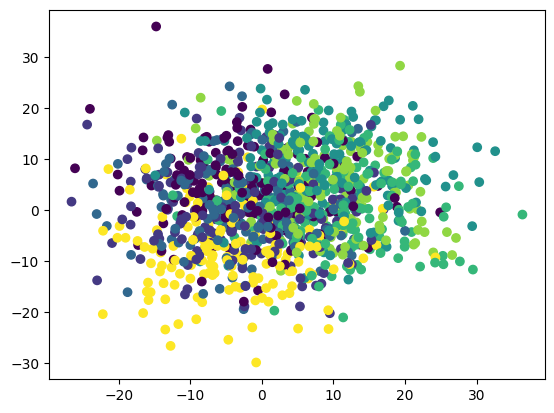

In [2]:
# YOUR CODE HERE
# Scatterplot of 2 arbitrary (different) features of the dataset. Each dot
# should represent a sample, and the color of the dot should represent the
# category of the sample.

# scatterplot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

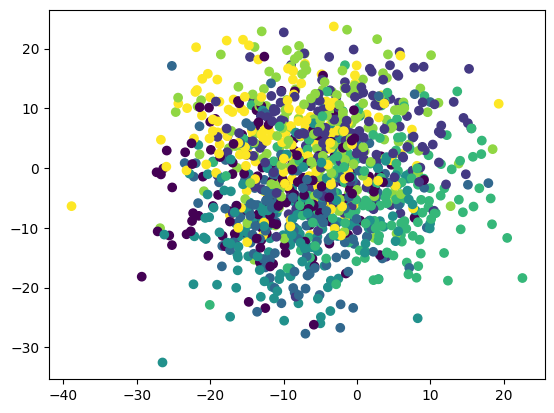

In [3]:
# YOUR CODE HERE
# Plot the other dimensions against each other

# scatterplot
import matplotlib.pyplot as plt

plt.scatter(X[:, 2], X[:, 3], c=y)

plt.show()


## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [4]:
# YOUR CODE HERE
# Encode the categorical target

# print y
print(y)

# apply to_categorical to y
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)

print(y_cat)


[2 2 5 ... 1 3 0]


2023-11-13 13:08:27.375275: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [5]:
# YOUR CODE HERE

# Split the data into training and testing sets (70/30)

# import train_test_split
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [6]:
# YOUR CODE HERE
# Use StandardScaler to scale the training and testing sets

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# create a StandardScaler instance
scaler = StandardScaler()

# fit the StandardScaler
scaler.fit(X_train)

# scale the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [7]:
from tensorflow.keras import layers, models


In [9]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################

    # Build NN model with 1st layer of 50 neurons and relu activation
    # and output layer for 7 classes
    model = models.Sequential([
        layers.Dense(50, input_shape=(8,), activation='relu'),
        layers.Dense(7, activation='softmax')
    ])


    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


model = initialize_model()


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [10]:
# YOUR CODE HERE
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807 (3.15 KB)
Trainable params: 807 (3.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [21]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 1.8769 - accuracy: 0.2321
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 1.6404 - accuracy: 0.4060
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 1.4604 - accuracy: 0.5274
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 1.3149 - accuracy: 0.6060
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 1.1990 - accuracy: 0.6345
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 1.1057 - accuracy: 0.6655
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 1.0323 - accuracy: 0.6833
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9726 - accuracy: 0.7012
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9263 - accuracy: 0.7036
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.8895 - accuracy: 0.7095
Epoch 11/50
27/27 [

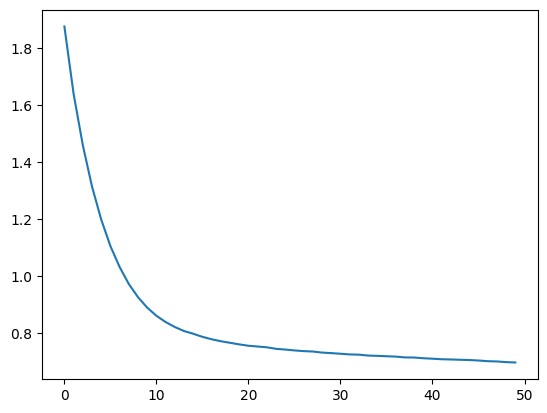

In [11]:
# YOUR CODE HERE
# Fit the model on the training data for 50 epochs

# fit the model
model.fit(X_train_scaled, y_train, epochs=50)

# plot the loss
plt.plot(model.history.history['loss'])
plt.show()


❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [12]:
# YOUR CODE HERE
# Evaluate the model on the test data and print loss and accuracy

# evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

# print the loss and accuracy
print(f'The loss is {test_loss}')
print(f'The accuracy is {test_acc}')


12/12 [==============================] - 0s 1ms/step - loss: 0.8546 - accuracy: 0.6861
The loss is 0.8545835614204407
The accuracy is 0.6861110925674438


❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [14]:
import pandas as pd


pd.Series(y).value_counts()


2    172
1    172
0    172
5    171
4    171
3    171
6    171
dtype: int64

In [16]:
accuracy_baseline = None
# Calculate the baseline accuracy and assign it to the above variable
accuracy_baseline = 0.14333333333333334

y__ = pd.Series(y)
y__.value_counts().max() / len(y__)


0.14333333333333334

🧪 **Test your code**

In [17]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-multiclass-classification/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

Epoch 1/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.9678 - accuracy: 0.1393 
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.7359 - accuracy: 0.3750
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.5495 - accuracy: 0.5357
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.3955 - accuracy: 0.6083
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.2659 - accuracy: 0.6476
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.1602 - accuracy: 0.6702
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.0747 - accuracy: 0.6821
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.0062 - accuracy: 0.6976
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9550 - accuracy: 0.7083
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9139 - accuracy: 0.717

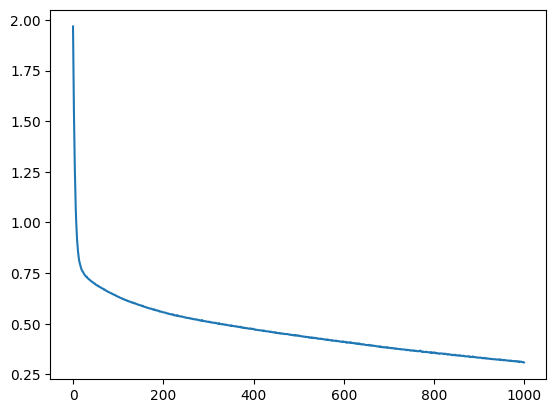

In [18]:
# YOUR CODE HERE
# Re-initialize the model and fit it on the training data for 1000 epochs and
# plot the loss

# initialize the model
model = initialize_model()

# fit the model
model.fit(X_train_scaled, y_train, epochs=1000)

# plot the loss
plt.plot(model.history.history['loss'])
plt.show()


❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [19]:
# YOUR CODE HERE
# Evaluate the model on the test data and print loss and accuracy

# evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

# print the loss and accuracy
print(f'The loss is {test_loss}')
print(f'The accuracy is {test_acc}')


12/12 [==============================] - 0s 1ms/step - loss: 1.6734 - accuracy: 0.5917
The loss is 1.6734333038330078
The accuracy is 0.5916666388511658


* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> Overfitting 

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

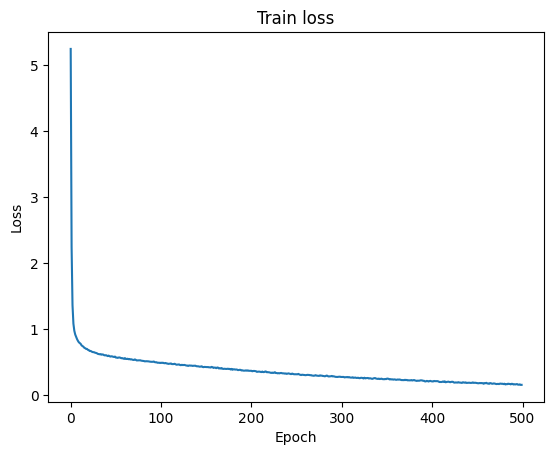

In [22]:
model = initialize_model()

history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 500,
                    batch_size = 16,
                    verbose = 0)
plot_history(history)


😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [23]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()


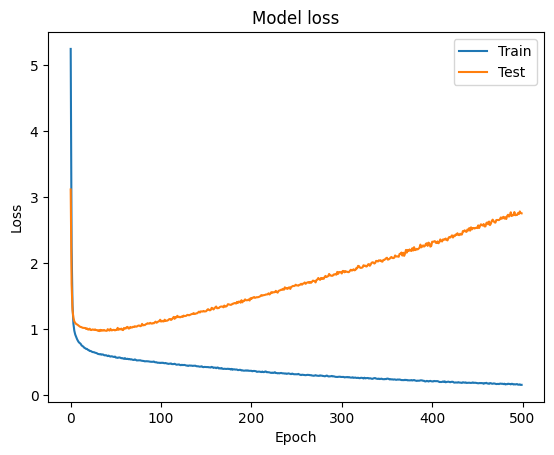

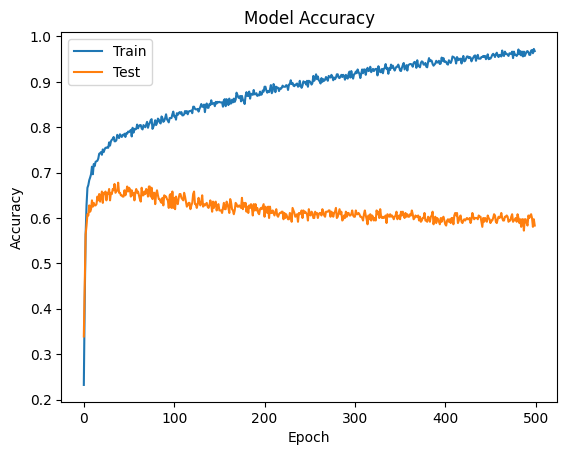

In [24]:
# YOUR CODE HERE

plot_loss_accuracy(history)


🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!